In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import *
import requests

from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import re

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize 


In [24]:
df_left = pd.read_csv('C:/Users/Minhee KYOUNG/Downloads/ElectionLeft.csv')
df_left.head()

,Unnamed: 0,Comments
0,0,Joe Biden looks like old captain America in en...
1,1,There's just too much unlawful stuff going on ...
2,2,We are living in a time dimension where captai...
3,3,“We are gonna win this race”\n\nProceeds to ch...
4,4,The US election results remind me of the occas...


In [23]:
df_right = pd.read_csv('C:/Users/Minhee KYOUNG/Downloads/ElectionRight.csv')
df_right.head()

,Unnamed: 0,Comments
0,0,I’m not even American yet I’m checking on the ...
1,1,"""you need to have a /slight/ Indian accent"" - ..."
2,2,"""you need to have a /slight/ Indian accent"" - ..."
3,3,"He basically said, I’m not here to say that I ..."
4,4,"The youtube app is so easy to open, the bbc ap..."


In [41]:
# Remove special words like @#$%&
def txt_clean(text):
    pattern = '[^\w\s]'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text

comments_right =  df_right['Comments'].str.lower()
comments_compiled_right = ' '.join(word_tokenize('\n'.join(comments_right)))
comments_cleaned_right = txt_clean(comments_compiled_right)

comments_left =  df_left['Comments'].str.lower()
comments_compiled_left = ' '.join(word_tokenize('\n'.join(comments_left)))
comments_cleaned_left = txt_clean(comments_compiled_left)

In [76]:
# Remove stopwords
from gensim.parsing.preprocessing import STOPWORDS
all_stopwords_gensim = STOPWORDS.union(set(['nt', 'biden', 'trump', 'joe','s', 't', 'a']))

text_tokens_right = word_tokenize(comments_cleaned_right)
result_right = [word for word in text_tokens_right if not word in all_stopwords_gensim]

text_tokens_left = word_tokenize(comments_cleaned_left)
result_left = [word for word in text_tokens_left if not word in all_stopwords_gensim]

In [43]:
#Masks to change the shape of the wordclouds (a png is necessary)
trump_mask = np.array(Image.open(requests.get('https://wpclipart.com/American_History/presidents/additional_images/Donald_Trump/Trump_silhouette.png', stream=True).raw))
biden_mask = np.array(Image.open(requests.get('http://www.pngall.com/wp-content/uploads/5/Biden-PNG-Free-Download.png', stream=True).raw))

In [77]:
# Count word frequency
# Change frequency value to 
freq_right = Counter(result_right)
word_dict = dict(freq_right)
freq_right_final = {key : value for key, value in word_dict.items() if value >= 3000}

freq_left = Counter(result_left)
word_dict = dict(freq_left)
freq_left_final = {key : value for key, value in word_dict.items() if value >= 3000}


print(freq_right_final)
print(freq_left_final)

{'m': 5807, 'american': 5414, 'election': 10927, 'need': 6492, 'said': 3542, 'won': 4637, 'new': 3981, 'states': 4547, 'country': 6204, 'president': 15866, 'america': 8970, 'going': 7679, 'think': 5745, 'like': 13720, 'people': 21850, 'love': 4227, 'money': 4136, 'got': 4127, 'votes': 5772, 'know': 7885, 'news': 6293, 'win': 4730, 'want': 6017, 'world': 5169, 'lol': 3436, 'man': 5144, 'let': 4290, 'vote': 7474, 'time': 7174, 'stop': 3684, 'right': 5373, 'voting': 3014, 'fraud': 6203, 'come': 3382, 'good': 5937, 'god': 8628, 'look': 3198, '2020': 3551, 'ca': 3363, 'state': 3924, 'media': 4854, 'democrats': 5542, 'americans': 3125, 'way': 5089, 'great': 3484, 'believe': 3291, 'years': 4908, 'china': 4288, 'needs': 3857, 'big': 3006}
{'like': 10968, 'america': 6961, 'going': 5103, 'time': 4830, 'win': 4632, 'way': 3748, 'election': 9435, 'god': 4115, 'm': 5048, 'president': 9088, 'won': 4133, 'love': 3199, 'let': 3081, 'right': 3814, 'world': 5133, 'country': 4614, 'votes': 5855, 'lol': 3

In [72]:
#The function that will generate the wordcloud from a corpus and the mask (shape of the wordcloud)

def generate_wordcloud(frequence, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', mask=mask, stopwords=STOPWORDS).generate_from_frequencies(frequence)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

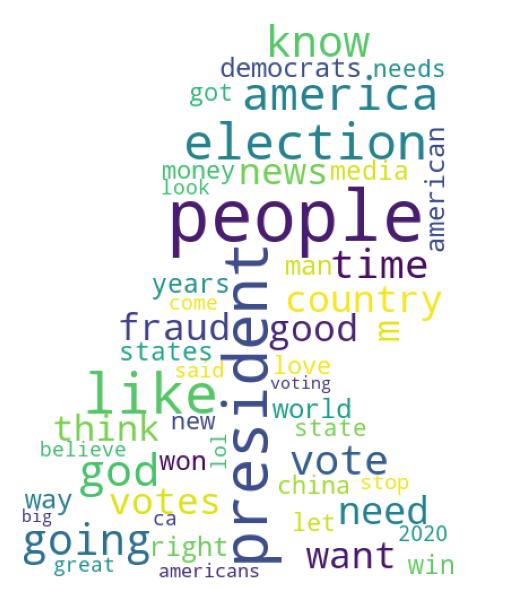

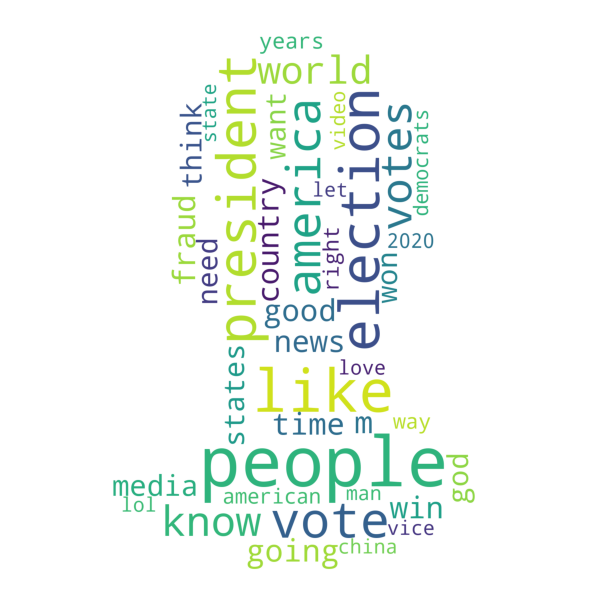

In [78]:
#Example with Trump shape
generate_wordcloud(freq_right_final, trump_mask)
generate_wordcloud(freq_left_final, biden_mask)

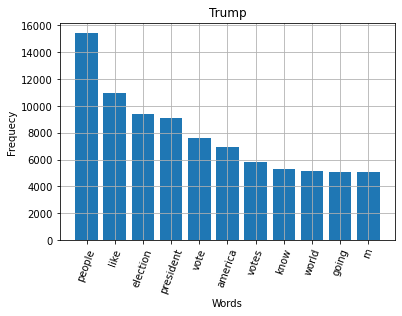

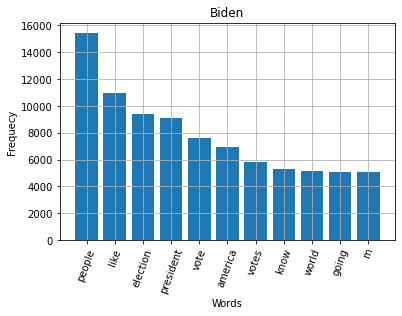

In [79]:
freq_right_final = {key : value for key, value in word_dict.items() if value >= 5000}
freq_left_final = {key : value for key, value in word_dict.items() if value >= 5000}

def showGraph(X, wordInfo):
    plt.title(X)
    plt.xlabel('Words')
    plt.ylabel('Frequecy')
    plt.grid(True)
    
    Sorted_Dict_Values = sorted(wordInfo.values(), reverse=True)
    Sorted_Dict_Keys = sorted(wordInfo, key=wordInfo.get, reverse=True)

    plt.bar(range(len(wordInfo)), Sorted_Dict_Values, align='center')
    plt.xticks(range(len(wordInfo)), list(Sorted_Dict_Keys), rotation='70')

    plt.show()
    
showGraph('Trump', freq_right_final)
    
showGraph('Biden', freq_left_final)